In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# **The Impact of Resting Heart Rate, Cholesterol, and Sex on Exercise Induced Angina and Types of Chest Pain**

### Introduction

Chest pain manifests in various intensities and forms, stemming from diverse causes such as heart-related, digestive, muscular, or pulmonary issues. Angina, specifically, correlates with reduced blood flow to the heart (Mayo Clinic, n.d). Heart rate plays a significant role: both bradycardia (slow heart rate) and tachycardia (fast heart rate) can trigger chest pain, especially in cases of angina where oxygen-rich blood supply to the heart is insufficient (Mayo Clinic, n.d.). High cholesterol contributes to arterial plaque buildup, restricting blood flow and increasing the likelihood of chest pain, including angina. Notably, chest pain presentations vary between genders, affecting diagnosis and data interpretation (Mayo Clinic, n.d.). This project aims to evaluate the influence of resting heart rate, cholesterol levels, and gender on exercise-induced angina and types of chest pain, addressing the question: How do these factors impact chest pain and angina occurrence?

##### Clearly state the question you will try to answer with your project

What is the impact of resting heart rate, cholesterol, and sex on exercise induced angina and types of chest pain?

##### Identify and describe the dataset that will be used to answer the question

We will utilize the [Heart Disease dataset available from the UC Irvine website](https://archive.ics.uci.edu/dataset/45/heart+disease), comprising data from four locations: Cleveland, Hungary, Switzerland, and the VA Long Beach. Our analysis will concentrate on the Cleveland and Hungary datasets. The dataset encompasses 76 attributes and 13 features. Given the extensive array of variables, our project will specifically investigate the impact of heart rate, cholesterol levels, and gender on the occurrence of heart disease.


### Preliminary Data Analysis

##### Demonstrate that the dataset can be read from the web into R and clean and wrangle your data into a tidy format

The dataset contains the following variables:
- ``age`` (Age in years)
- ``sex`` (Sex; 1 = male; 0 = female)
- ``cp`` (Chest pain type; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- ``tresbps`` (Resting Blood pressure in mm Hg on admission to the hospital)
- ``chol`` (Serum cholesterol in mg/dl)
- ``fbs`` (Fasting blood sugar > 120 mg/dl; 1 = yes; 0 = no)
- ``restecg`` (Resting electrocardiographic results; 0 = normal; 1 = ST-T wave abnormality; 2 = probable or definite left ventricular hypertrophy)
- ``thalach`` (Maximum heart rate achieved)
- ``exang`` (Exercise induced angina; 1 = yes; 0 = no)
- ``oldpeak`` (ST depression induced by exercise relative to rest)
- ``slope`` (Slope of peak exercise ST segment; 1 = positive; 2 = flat; 3 = negative)
- ``ca`` (Number of major vessels; 0-3)
- ``thal`` (Thallium stress test; 3 = normal; 6 = fixed defect; 7 = reversable defect)
- ``num`` (Diagnosis of heart disease; 0 = <50% diameter narrowing; 1 = >50% diameter narrowing)

In [2]:
# The following will be the only data frames that will be used
processed_cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
reprocessed_hungarian_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"
processed_cleveland_data <- read_delim(processed_cleveland_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"), na = "?")
reprocessed_hungarian_data <- read_delim(reprocessed_hungarian_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"), na = "-9")
heartdata <- rbind(processed_cleveland_data, reprocessed_hungarian_data) |>
    mutate(sex = as_factor(sex)) |>
    mutate(fbs = as_factor(fbs)) |>
    mutate(slope = as_factor(slope)) |>
    mutate(cp = as_factor(cp)) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(thal = as_factor(thal)) |>
    mutate(exang = as_factor(exang))
heartdata

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,1,3,110,211,0,0,138,0,0,NA,NA,6,0
47,0,2,140,257,0,0,135,0,1,1,NA,NA,0
53,1,4,130,182,0,0,148,0,0,NA,NA,NA,0


In [3]:
heart_split <- initial_split(heartdata, prop = 3/4, strata = exang)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

##### Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

What we want to be able to predict is ``exang`` and ``cp``.  
The only variables that will be used are ``sex``, ``chol``, and ``trestbps``.

In [4]:
# Number of entries per class of 'exang'
heart_train_count_exang <- heart_train %>%
    group_by(exang) %>%
    summarise(number = n())

heart_train_count_exang

# Number of entires per class of 'cp'
heart_train_count_cp <- heart_train %>%
    group_by(cp) %>%
    summarise(number = n())

heart_train_count_cp

exang,number
<fct>,<int>
0,306
1,140
NA,1


cp,number
<fct>,<int>
1,24
2,123
3,104
4,196


In [5]:
# Min and max when exang is true
exang_true_domain <- heart_train %>%
    filter(exang == 1) %>%
    select(trestbps:chol) %>%
    map_df(range)
# Min and max when exang is false
exang_false_domain <- heart_train %>%
    filter(exang == 0) %>%
    select(trestbps:chol) %>%
    map_df(range)

exang_true_domain
exang_false_domain

trestbps,chol
<dbl>,<dbl>
92,NA
200,NA


trestbps,chol
<dbl>,<dbl>
94,NA
192,NA


In [6]:
# Averages when exang is true
exang_true_averages <- heart_train %>%
    filter(exang == 1) %>%
    select(trestbps:chol) %>%
    map_df(mean)
# Averages when exang is false
exang_false_averages <- heart_train %>%
    filter(exang == 0) %>%
    select(trestbps:chol) %>%
    map_df(mean)

exang_true_averages
exang_false_averages

trestbps,chol
<dbl>,<dbl>
135.7143,NA


trestbps,chol
<dbl>,<dbl>
131.585,NA


##### Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


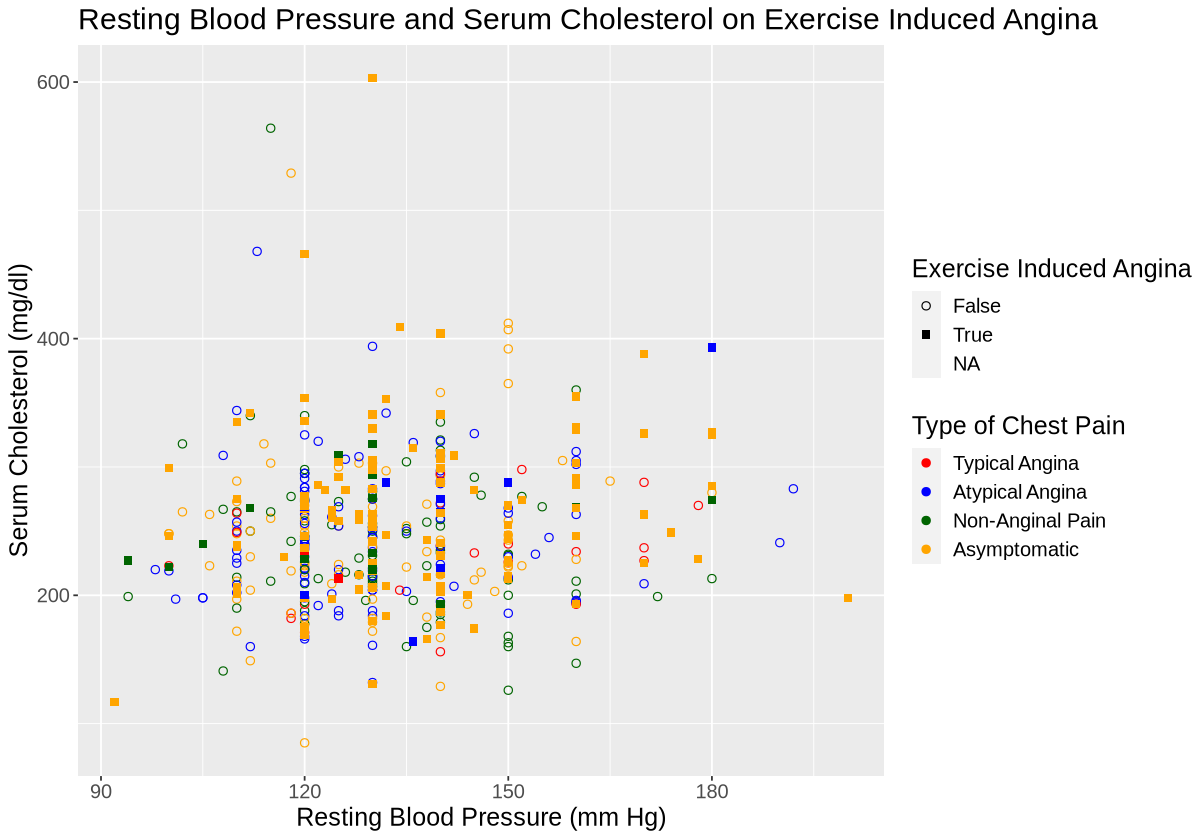

In [7]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(heart_train, aes(x = trestbps, y = chol, shape = exang, color = cp)) +
    geom_point(size = 2) +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholesterol (mg/dl)", shape = "Exercise Induced Angina", color = "Type of Chest Pain") +
    ggtitle("Resting Blood Pressure and Serum Cholesterol on Exercise Induced Angina") +
    scale_shape_manual(labels = c("False", "True"), values = c(1, 15)) +
    scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"), values = c("red", "blue", "dark green", "orange")) +
    theme(text = element_text(size = 15))

### Methods

##### Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

To predict the likeliness of an exercise-induced angina and chest pain, the data will undergo processing, data exploration, data splitting, model training using the K-nearest-neighbors algorithm, model evaluation, and 5-fold cross-validation. We will use sex, resting heart rate, and cholesterol as our predictors for the classification.

##### Describe at least one way that you will visualize the results

To visualize the relationships in our data, we’ll generate scatter plots that depicts the relationship between our predictors with the likelihood of angina and chest pain. Each point on the scatter plot will represent a data instance, allowing for a concise visualization of potential patterns or trends in the data. 

### Expected Outcomes and Significance

##### What do you expect to find?

In the context of this classification study, the anticipated outcomes revolve around the development of predictive models using the heart disease dataset from the UC Irvine Machine Learning Repository. The research aims to identify discerning relationships among resting heart rate, cholesterol levels, and sex relating to exercise-induced angina and chest pain types. Employing classification algorithms in the R programming language, the focus is on constructing models capable of accurately categorizing individuals based on physiological variables. Meticulous examination of the dataset involves discerning potential interactions and dependencies, with the ultimate objective of contributing empirical evidence to advance understanding in cardiovascular dynamics, particularly regarding exercise-induced angina. Cross-validation techniques and evaluation metrics are integral components, ensuring the reliability and generalizability of the classification models.

##### What impact could such findings have?

The findings of this study could have notable implications within the field of cardiovascular health. Specifically, discerning relationships among resting heart rate, cholesterol levels, and sex concerning exercise-induced angina and chest pain types may contribute to refining risk assessment models. Identifying patterns that link these physiological variables to the occurrence and characterization of cardiovascular events during exercise could inform targeted preventive strategies. The potential impact extends to personalized healthcare interventions, as understanding the specific influence of resting heart rate, cholesterol, and sex may facilitate tailored treatments, optimizing the management of exercise-induced anginas. Additionally, the findings may offer concrete empirical evidence for healthcare practitioners, enabling them to make informed decisions based on individual physiological profiles, ultimately contributing to advancements in evidence-based cardiology practices.

##### What future questions could this lead to?

The outcomes of this study may lead to several future research questions and avenues for exploration within the scope of cardiovascular health. For instance, the identified relationships among resting heart rate, cholesterol levels, and sex concerning exercise-induced angina and chest pain types could prompt inquiries into the underlying physiological mechanisms governing these associations. Subsequent investigations might delve into molecular pathways, genetic predispositions, or inflammatory markers that indicate potential relationships observed within the dataset. Additionally, the study's findings could lead to research into lifestyle factors that may interact with the identified physiological variables. Understanding how elements like physical activity, dietary habits, or medication usage impact the relationships between resting heart rate, cholesterol, sex, and exercise-induced angina could provide a more comprehensive understanding of cardiovascular health.

### Bibliography

Angina - Symptoms and causes - Mayo Clinic. (2022, March 30). Mayo Clinic.  
Tachycardia - Symptoms and causes - Mayo Clinic. (2023, December 15). Mayo Clinic.  
Bradycardia - Symptoms and causes - Mayo Clinic. (2022, May 7). Mayo Clinic.  
High cholesterol - Symptoms and causes - Mayo Clinic. (2023, January 11). Mayo Clinic.  